<h1 align="center">PH DENGUE ANALYTICS</h1>
<p style="font-style: italic; color: gray; text-align: center;">
  An analytical overview of dengue patterns in the Philippines.
</p>
<hr>
<h3 align="center">Analyst: Marianne Mae S. Capuno</h3>


<h2>Import Libaries</h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

<h2>Converting Dataset(s) into DataFrame</h2>
<h2>Requirements</h2>
<ul>
    <li>
        Name of the DataFrame
    </li>
    <li>
        File Path
    </li>
</ul>

In [2]:
dengue = pd.read_csv("datasets\\dengue.csv")
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h2>Descriptive Analytics</h2>

In [3]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [4]:
dengue.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1020.0,2018.000000,1.414907,2016.0,2017.00,2018.0,2019.00,2020.0
Dengue_Cases,1020.0,1124.926471,1662.608878,10.0,247.75,582.5,1284.25,21658.0
Dengue_Deaths,1020.0,16.513725,96.358215,0.0,1.00,3.0,7.00,1651.0


<h2>Knowing the structure of the dataframe</h2>

In [5]:
dengue.info()
dengue.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


(1020, 5)

In [6]:
dengue.columns

Index(['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths'], dtype='object')

<h2>Filling up Null Values</h2>

In [7]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h2>Changing Dtypes</h2>

In [8]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h2>Adding Columns</h2>

In [9]:
dengue['Fatality_Rate'] = round((dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100, 2)
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Fatality_Rate
0,January,2016,Region I,705,1,0.14
1,February,2016,Region I,374,0,0.00
2,March,2016,Region I,276,0,0.00
3,April,2016,Region I,240,2,0.83
4,May,2016,Region I,243,1,0.41
...,...,...,...,...,...,...
1015,August,2020,BARMM,91,0,0.00
1016,September,2020,BARMM,16,8,50.00
1017,October,2020,BARMM,13,9,69.23
1018,November,2020,BARMM,15,1,6.67


In [10]:
dengue['Severity'] = dengue['Dengue_Cases'].apply(lambda x: 'High' if x > 1000 else 'Low')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Fatality_Rate,Severity
0,January,2016,Region I,705,1,0.14,Low
1,February,2016,Region I,374,0,0.00,Low
2,March,2016,Region I,276,0,0.00,Low
3,April,2016,Region I,240,2,0.83,Low
4,May,2016,Region I,243,1,0.41,Low
...,...,...,...,...,...,...,...
1015,August,2020,BARMM,91,0,0.00,Low
1016,September,2020,BARMM,16,8,50.00,Low
1017,October,2020,BARMM,13,9,69.23,Low
1018,November,2020,BARMM,15,1,6.67,Low


<hr>
<h2 align="center">VISUALIZATIONS USING SEABORN</h2>

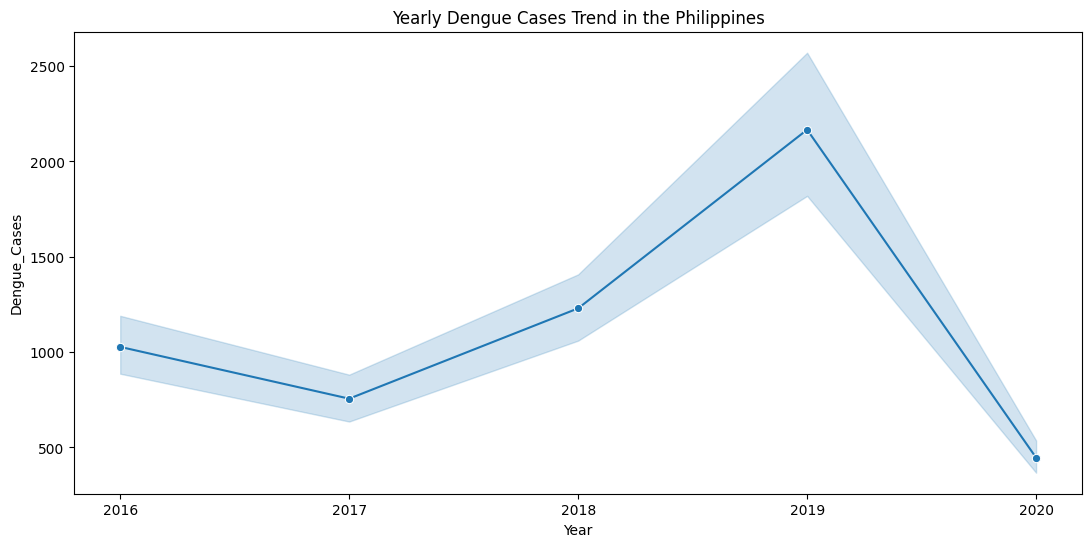

In [11]:
plt.figure(figsize=(13,6))
sns.lineplot(data=dengue, x="Year", y="Dengue_Cases", marker="o")
plt.title("Yearly Dengue Cases Trend in the Philippines")
plt.xticks(dengue["Year"].unique().astype(int))
plt.show()

<h3 style="color:#6A5ACD; font-weight:60; width:180px;">Insights</h3>

<p style="background-color:#f8f9fa; padding:15px; border-radius:10px; line-height:1.6; border:1px solid #dee2e6;">
<b>Overview:</b> The line plot illustrates the annual trend of dengue cases across the Philippines from 2016 to 2020, showing how the disease has evolved over time.
</p>

<ul style="line-height:1.8; color:#343a40;">
<ul style="line-height:1.8; color:#343a40;">
  <li><b>2019 Outbreak:</b> Dengue cases surged, with over 250,000 reported and more than 1,000 deaths, marking a major outbreak in the Philippines.</li>
  <li><b>Vaccine Impact:</b> The Dengvaxia vaccine was introduced in 2016, but in 2017 safety concerns arose that it could increase severe dengue risk in those not previously infected, leading to public hesitancy.</li>
  <li><b>Decline in 2020:</b> Cases dropped significantly due to COVID-19 lockdowns, reduced mobility, and heightened public health measures.</li>
  <li><b>Recommendations:</b> Strengthen mosquito control, rebuild public trust in vaccines, and promote community engagement to prevent future outbreaks.</li>
</ul>

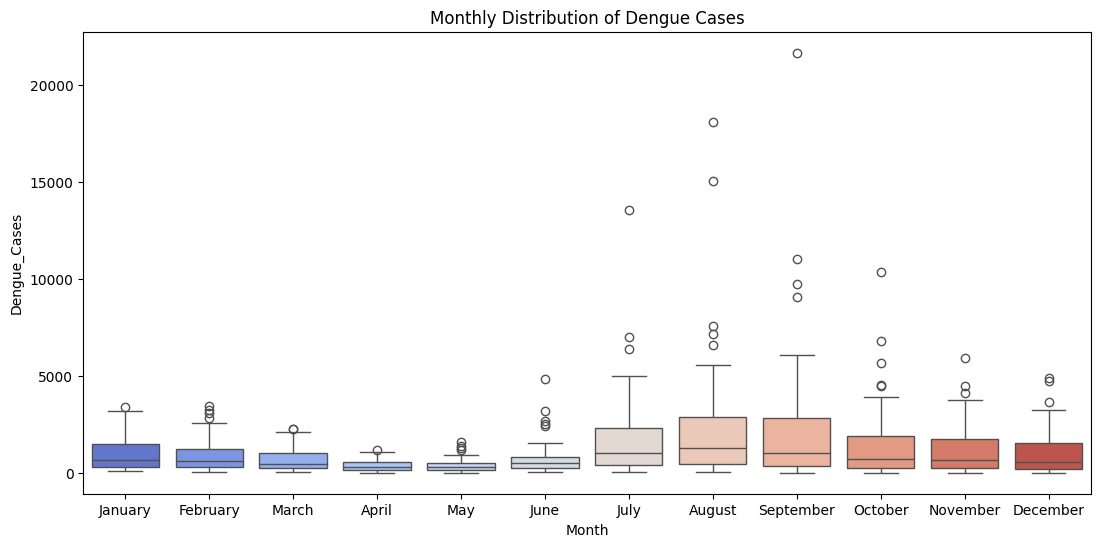

In [12]:
plt.figure(figsize=(13,6))
sns.boxplot(data=dengue, x="Month", y="Dengue_Cases", palette="coolwarm")
plt.title("Monthly Distribution of Dengue Cases")
plt.show()

<h3 style="color:#6A5ACD; font-weight:60; width:180px;">Insights</h3>

<p style="background-color:#f8f9fa; padding:15px; border-radius:10px; line-height:1.6; border:1px solid #dee2e6;">
<b>Overview:</b> The boxplot illustrates the monthly distribution of dengue cases in the Philippines, highlighting periods of higher and lower risk throughout the year.
</p>

<ul style="line-height:1.8; color:#343a40; list-style-type:square; margin-left:20px;">
  <li><b>Peak Months:</b> Dengue cases are highest from June to September, coinciding with heavier rainfall and increased mosquito activity.</li>
  <li><b>Lower Months:</b> Cases are generally lower from January to March, though preventive measures remain important to avoid sudden spikes.</li>
  <li><b>Community Action:</b> Removing standing water, maintaining clean surroundings, and using mosquito protection can reduce infection risk during high-risk months.</li>
  <li><b>Preparedness:</b> Health authorities should plan seasonal campaigns, monitor mosquito populations, and prepare medical resources ahead of peak months.</li>
</ul>

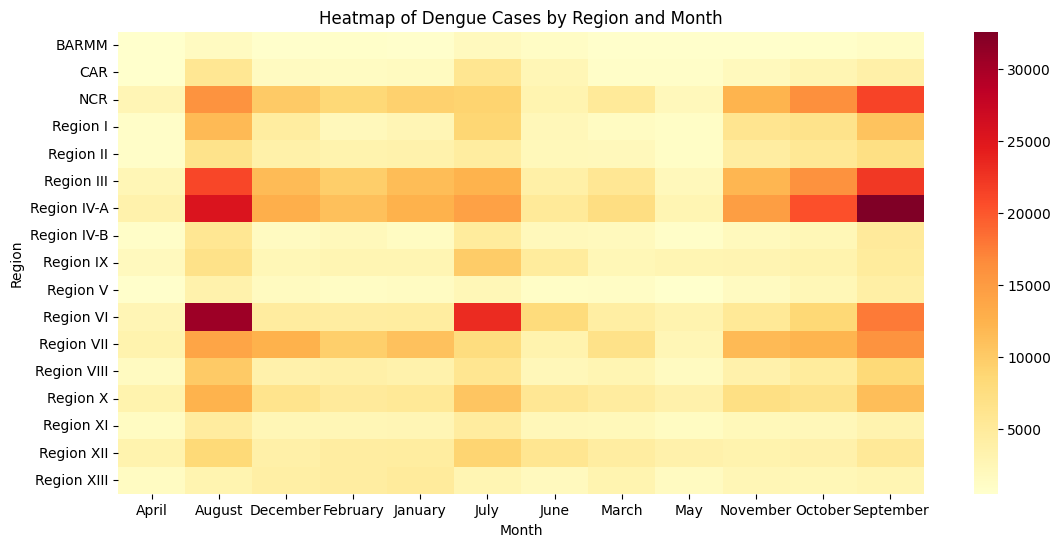

In [13]:
plt.figure(figsize=(13,6))
pivot = dengue.pivot_table(values="Dengue_Cases", index="Region", columns="Month", aggfunc="sum")
sns.heatmap(pivot, cmap="YlOrRd")
plt.title("Heatmap of Dengue Cases by Region and Month")
plt.show()

<h3 style="color:#6A5ACD; font-weight:60; width:180px;">Insights</h3>

<p style="background-color:#f8f9fa; padding:15px; border-radius:10px; line-height:1.6; border:1px solid #dee2e6;">
<b>Overview:</b> The heatmap displays the distribution of dengue cases across different regions and months, highlighting where and when infections are most concentrated.
</p>

<ul style="line-height:1.8; color:#343a40; list-style-type:square; margin-left:20px;">
  <li><b>Regional Hotspots:</b> NCR, CALABARZON, and Region VII consistently show higher dengue cases, indicating persistent regional vulnerability.</li>
  <li><b>Monthly Patterns:</b> Cases peak between June and September across most regions, reflecting increased mosquito activity during the rainy season.</li>
  <li><b>Targeted Action:</b> High-risk regions should focus on intensified mosquito control, community clean-up drives, and public awareness campaigns during peak months.</li>
  <li><b>Monitoring & Preparedness:</b> Authorities can use heatmaps like this to prioritize resources and interventions in regions with recurring outbreaks, improving response efficiency.</li>
</ul>

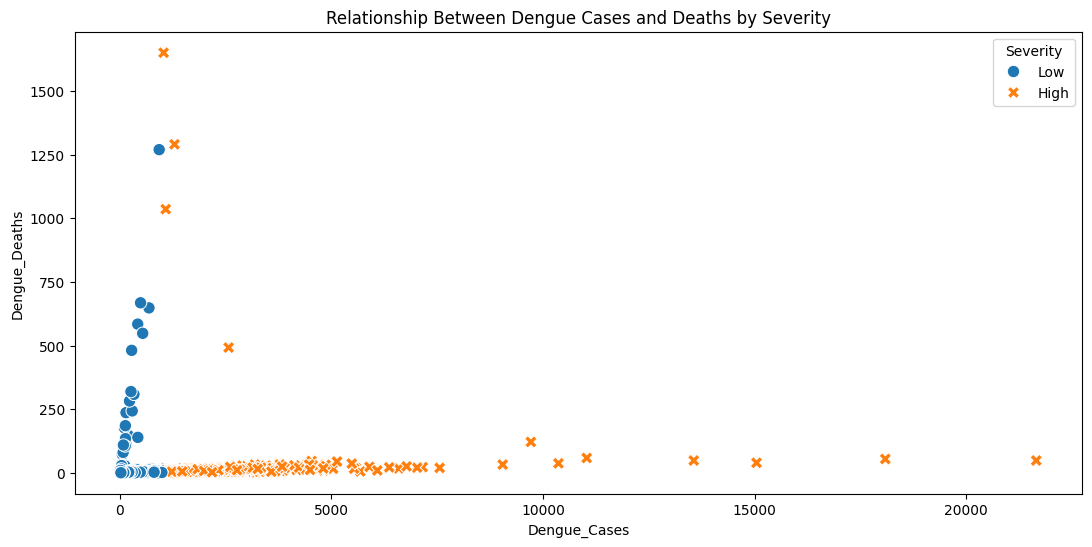

In [14]:
plt.figure(figsize=(13,6))
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths", hue="Severity", style="Severity", s=80)
plt.title("Relationship Between Dengue Cases and Deaths by Severity")
plt.show()

<h3 style="color:#6A5ACD; font-weight:60; width:180px;">Insights</h3>

<p style="background-color:#f8f9fa; padding:15px; border-radius:10px; line-height:1.6; border:1px solid #dee2e6;">
<b>Overview:</b> The scatterplot shows the relationship between dengue cases and deaths, separated by severity, highlighting how fatalities increase with larger outbreaks in the Philippines.
</p>

<ul style="line-height:1.8; color:#343a40; list-style-type:square; margin-left:20px;">
  <li><b>Severe Cases Correlation:</b> Regions with extremely high case counts often show disproportionately higher deaths, indicating that outbreaks with high volume are more deadly.</li>
  <li><b>Low Severity Cases:</b> Most low-case regions have near-zero fatalities, showing that smaller outbreaks are easier to manage and less deadly.</li>
  <li><b>Outliers in Mortality:</b> A few regions with relatively low cases still show higher deaths, possibly due to inadequate medical access, delayed reporting, or comorbidities.</li>
  <li><b>Recommendations:</b> Focus emergency response and medical resources on regions with high case clusters, improve early detection in outlier areas, and educate communities about rapid treatment for severe dengue symptoms.</li>
</ul>

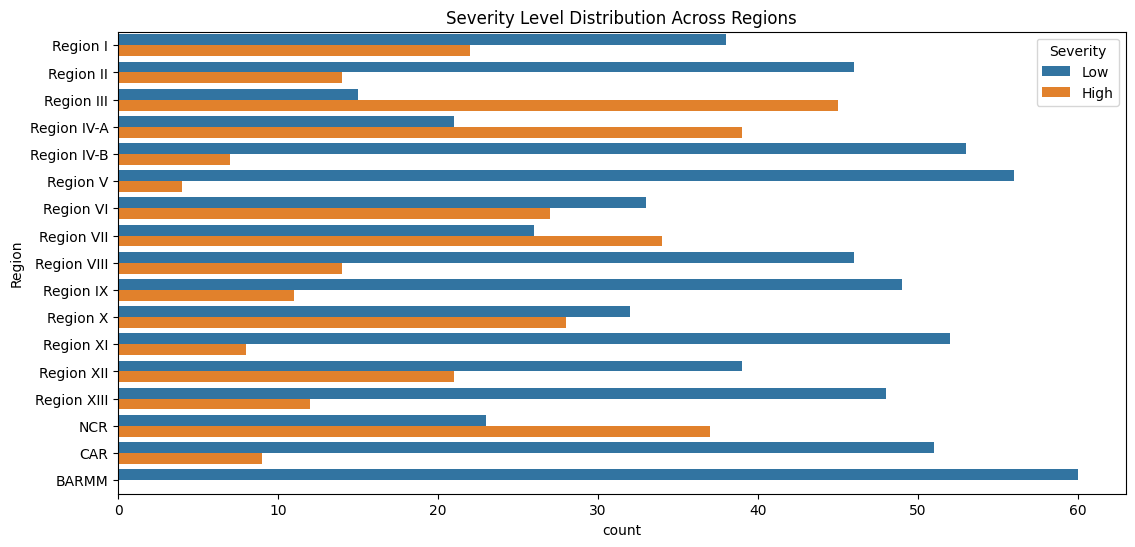

In [15]:
plt.figure(figsize=(13,6))
sns.countplot(data=dengue, y="Region", hue="Severity")
plt.title("Severity Level Distribution Across Regions")
plt.show()

<h3 style="color:#6A5ACD; font-weight:60; width:180px;">Insights</h3>

<p style="background-color:#f8f9fa; padding:15px; border-radius:10px; line-height:1.6; border:1px solid #dee2e6;">
<b>Overview:</b> The countplot shows the distribution of dengue severity levels across regions, highlighting which areas experience more high-severity cases.
</p>

<ul style="line-height:1.8; color:#343a40; list-style-type:square; margin-left:20px;">
  <li><b>High-Severity Hotspots:</b> NCR, CALABARZON, and Region VII report more high-severity cases, indicating consistent vulnerability in these regions.</li>
  <li><b>Low-Severity Dominance:</b> Most other regions predominantly have low-severity cases, suggesting better outbreak management or lower case volume.</li>
  <li><b>Regional Preparedness:</b> Regions with high-severity cases need strengthened healthcare readiness, faster reporting, and targeted vector control measures.</li>
  <li><b>Recommendations:</b> Allocate resources based on severity patterns, conduct community awareness campaigns in hotspot regions, and monitor trends to prevent escalation of cases.</li>
</ul>

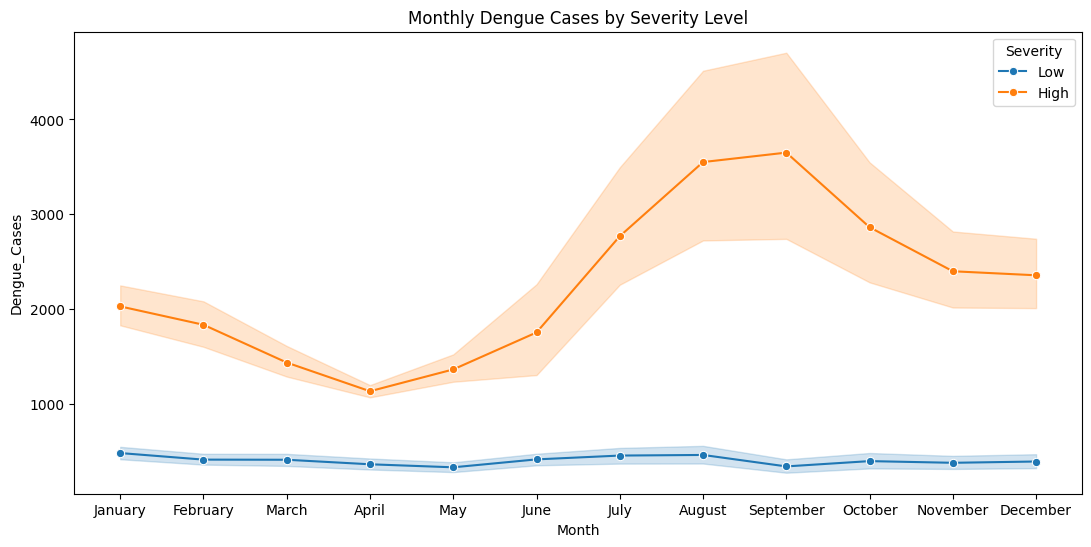

In [16]:
plt.figure(figsize=(13,6))
sns.lineplot(data=dengue, x="Month", y="Dengue_Cases", hue="Severity", marker="o")
plt.title("Monthly Dengue Cases by Severity Level")
plt.show()

<h3 style="color:#6A5ACD; font-weight:60; width:180px;">Insights</h3>

<p style="background-color:#f8f9fa; padding:15px; border-radius:10px; line-height:1.6; border:1px solid #dee2e6;">
<b>Overview:</b> The line plot shows how dengue cases fluctuate monthly, separated by severity, revealing patterns in both high- and low-severity cases throughout the year.
</p>

<ul style="line-height:1.8; color:#343a40; list-style-type:square; margin-left:20px;">
  <li><b>Peak Months:</b> High-severity cases spike mainly between June and September, reflecting the rainy season’s impact on mosquito breeding.</li>
  <li><b>Low-Severity Trends:</b> Low-severity cases remain more evenly distributed throughout the year but increase slightly during mid-year months.</li>
  <li><b>Seasonal Preparedness:</b> Authorities should anticipate and intensify medical and vector control interventions during the mid-year peak to reduce severe cases.</li>
  <li><b>Community Action:</b> Public education on early symptom recognition and protective measures can help prevent low-severity cases from escalating.</li>
</ul>

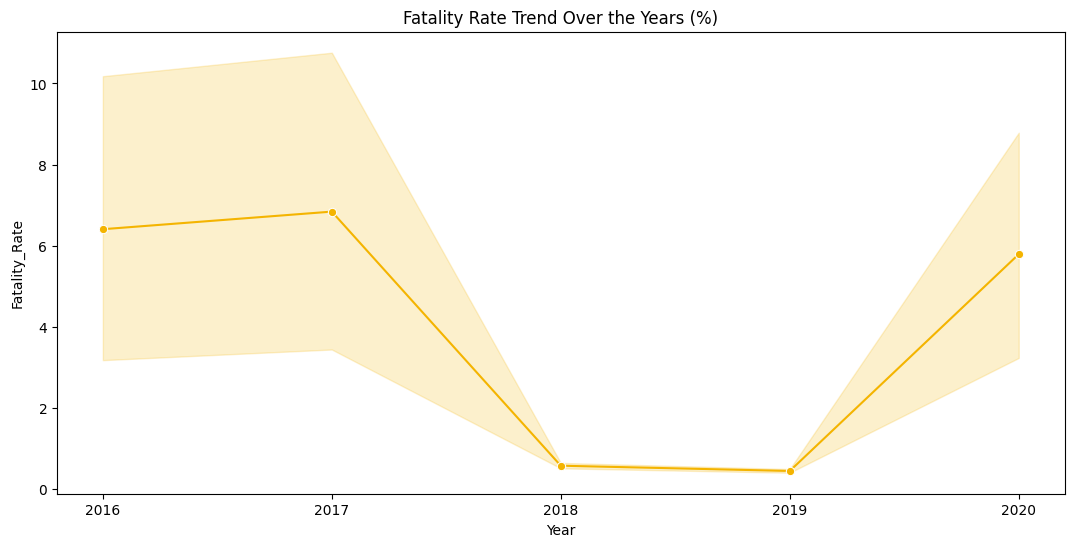

In [17]:
plt.figure(figsize=(13,6))
sns.lineplot(data=dengue, x="Year", y="Fatality_Rate", marker="o", color="#F4B400")
plt.title("Fatality Rate Trend Over the Years (%)")
plt.xticks(dengue["Year"].unique().astype(int))
plt.show()

<h3 style="color:#6A5ACD; font-weight:60; width:180px;">Insights</h3>

<p style="background-color:#f8f9fa; padding:15px; border-radius:10px; line-height:1.6; border:1px solid #dee2e6;">
<b>Overview:</b> The line plot shows the trend of dengue fatality rates in the Philippines from 2016 to 2020, highlighting changes in mortality relative to reported cases.
</p>

<ul style="line-height:1.8; color:#343a40; list-style-type:square; margin-left:20px;">
  <li><b>Stable Rates:</b> Fatality rates remain relatively low and stable across the years, despite fluctuations in total dengue cases.</li>
  <li><b>Outbreak Years:</b> Slight increases in fatality coincide with major outbreaks, such as the surge in 2019, reflecting higher healthcare demand during peak periods.</li>
  <li><b>Healthcare Impact:</b> Maintaining low fatality rates suggests effective medical management, early detection, and timely treatment in most regions.</li>
  <li><b>Recommendations:</b> Continue strengthening hospital readiness, early warning systems, and public awareness to ensure fatality rates remain low even during future outbreaks.</li>
</ul>

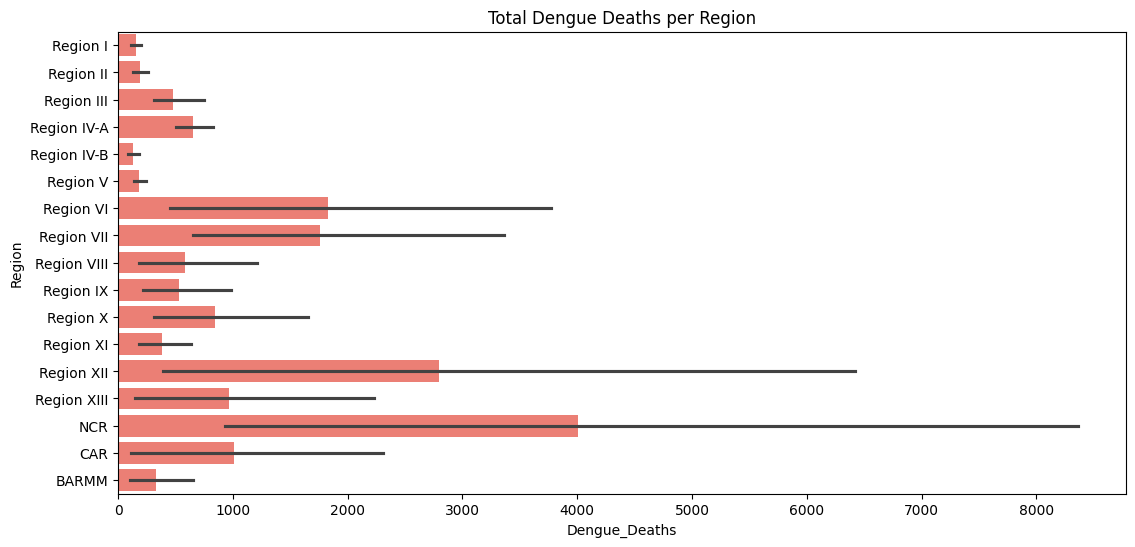

In [18]:
plt.figure(figsize=(13,6))
sns.barplot(data=dengue, y="Region", x="Dengue_Deaths", estimator="sum", color="#FF6F61")
plt.title("Total Dengue Deaths per Region")
plt.show()

<h3 style="color:#6A5ACD; font-weight:60; width:180px;">Insights</h3>

<p style="background-color:#f8f9fa; padding:15px; border-radius:10px; line-height:1.6; border:1px solid #dee2e6;">
<b>Overview:</b> The bar plot shows the total number of dengue deaths across regions, highlighting which areas experienced the highest mortality.
</p>

<ul style="line-height:1.8; color:#343a40; list-style-type:square; margin-left:20px;">
  <li><b>High Mortality Regions:</b> NCR, CALABARZON, and Region VII report the most deaths, correlating with regions that frequently experience high-severity outbreaks (cases >1000).</li>
  <li><b>Lower Mortality Regions:</b> Other regions show significantly fewer deaths, reflecting lower case volumes or better outbreak management.</li>
  <li><b>Healthcare Implications:</b> High-death regions may require additional hospital resources, improved early detection, and rapid treatment protocols during peak outbreaks.</li>
  <li><b>Recommendations:</b> Focus preventive measures and vector control in regions with historically high mortality, strengthen healthcare capacity, and maintain public awareness campaigns to reduce fatalities.</li>
</ul>

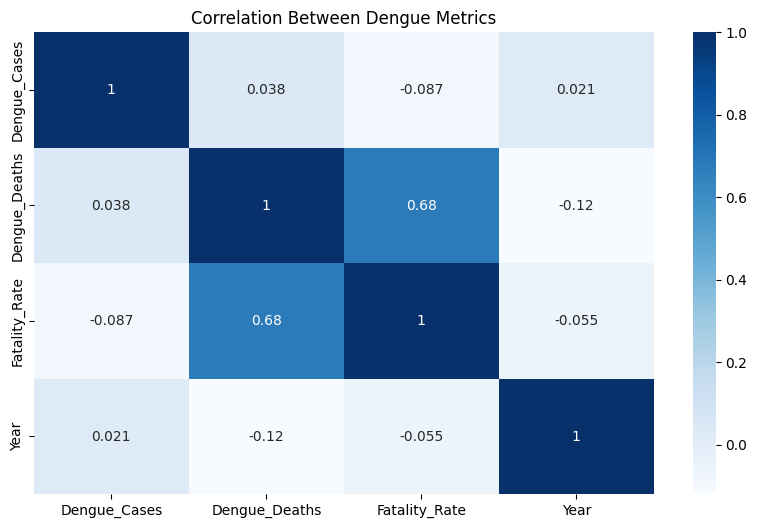

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(dengue[["Dengue_Cases","Dengue_Deaths","Fatality_Rate","Year"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Dengue Metrics")
plt.show()

<h3 style="color:#6A5ACD; font-weight:60; width:180px;">Insights</h3>

<p style="background-color:#f8f9fa; padding:15px; border-radius:10px; line-height:1.6; border:1px solid #dee2e6;">
<b>Overview:</b> The heatmap shows correlations among dengue cases, deaths, fatality rate, and year, highlighting how large outbreaks impact mortality and severity trends in the Philippines from 2016 to 2020.
</p>

<ul style="line-height:1.8; color:#343a40; list-style-type:square; margin-left:20px;">
  <li><b>Cases & Deaths:</b> A strong positive correlation confirms that years and regions with high-case volumes, like NCR and CALABARZON in 2019, experienced proportionally higher deaths.</li>
  <li><b>Cases & Fatality Rate:</b> Weak correlation indicates that even regions with high case counts often kept fatality rates low (<2%), reflecting effective early medical interventions and outbreak management.</li>
  <li><b>Deaths & Year:</b> Slightly higher deaths in 2019 align with the 2019 outbreak peak, while 2020 shows lower deaths due to reduced mobility and COVID-19 measures.</li>
  <li><b>Recommendations:</b> Focus interventions on high-case regions during peak months, maintain early detection and treatment systems, and reinforce vector control to prevent future spikes in both cases and deaths.</li>
</ul>

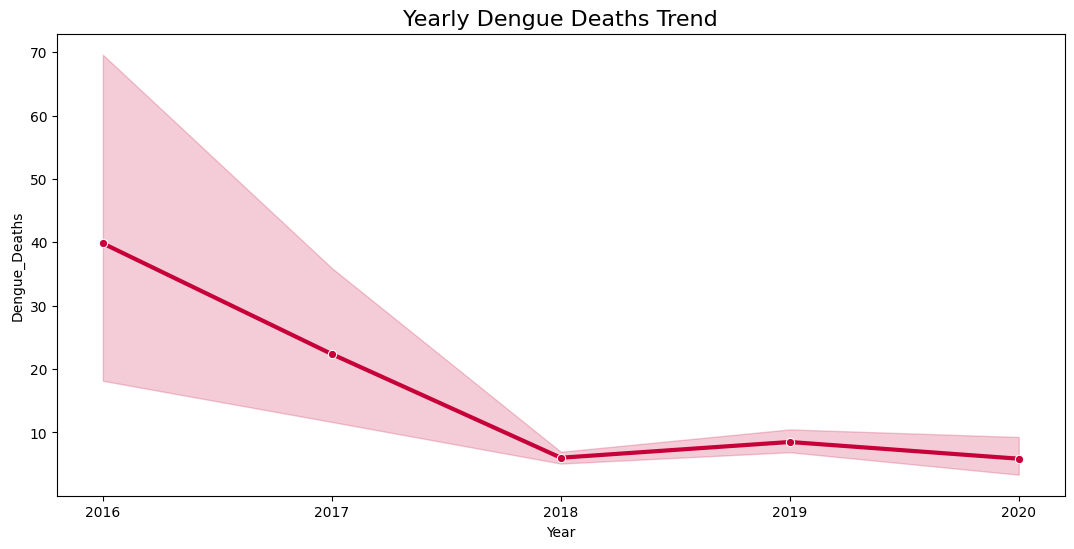

In [20]:
plt.figure(figsize=(13,6))
sns.lineplot(data=dengue, x="Year", y="Dengue_Deaths", marker="o", color="#C70039", linewidth=3)
plt.title("Yearly Dengue Deaths Trend", fontsize=16)
plt.xticks(dengue["Year"].unique().astype(int))
plt.show()

<h3 style="color:#6A5ACD; font-weight:60; width:180px;">Insights</h3>

<p style="background-color:#f8f9fa; padding:15px; border-radius:10px; line-height:1.6; border:1px solid #dee2e6;">
<b>Overview:</b> The line plot shows the annual trend of dengue deaths in the Philippines from 2016 to 2020, highlighting years with high mortality and linking them to outbreak severity.
</p>

<ul style="line-height:1.8; color:#343a40; list-style-type:square; margin-left:20px;">
  <li><b>2019 Peak:</b> Dengue deaths reached their highest in 2019, corresponding to a high-severity outbreak with case counts exceeding 1000 in several regions, including NCR and CALABARZON.</li>
  <li><b>2016-2017 Vaccine Context:</b> Fatality rates remained moderate despite the Dengvaxia vaccine introduction and subsequent public hesitancy, reflecting cautious management of severe cases.</li>
  <li><b>2020 Decline:</b> Deaths dropped in 2020 due to fewer reported cases during COVID-19 lockdowns, reduced mobility, and intensified public health measures.</li>
  <li><b>Recommendations:</b> Prioritize high-severity regions for rapid medical response during outbreaks, maintain robust hospital capacity, and educate communities on early detection to reduce mortality.</li>
</ul>
<hr>